In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import datetime

In [2]:
s = pd.read_csv('semiotiq.csv', parse_dates=[5])

In [3]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(s['oldOwner'])

x = pd.DataFrame(lb_results, columns=lb_style.classes_)

In [4]:
x.index = s['dtg']

In [5]:
s.loc[s['oldOwner'].isin(s[s['age'] >= 150]['oldOwner'].unique()), 'onyx']=1
s.loc[~s['oldOwner'].isin(s[s['age'] >= 150]['oldOwner'].unique()), 'notonyx']=1

In [6]:
y=s[['dtg','onyx','notonyx']]
y.index=s['dtg']

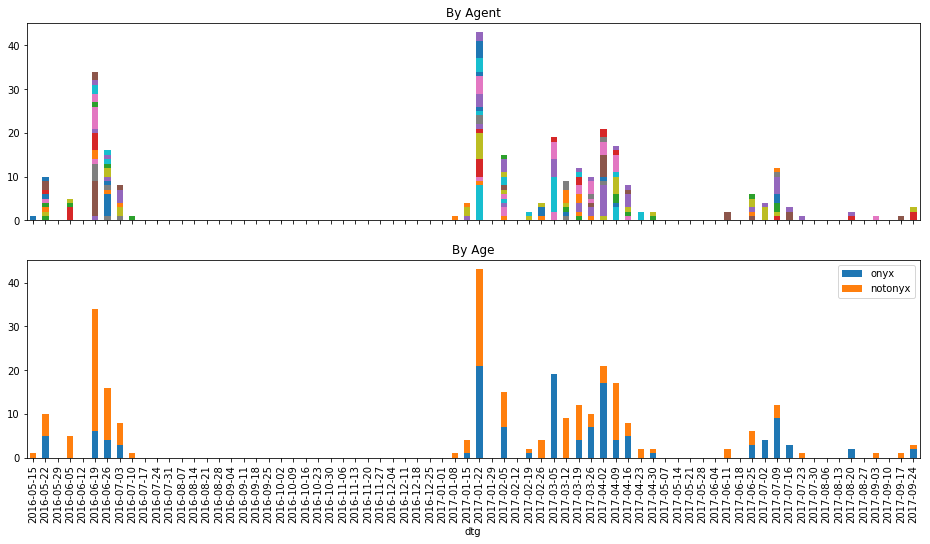

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16,8))

x.resample('W').sum().plot.bar(stacked=True, legend=False, ax=axes[0])
axes[0].set_title('By Agent')

y.resample('W').sum().plot.bar(stacked=True, legend=True, ax=axes[1])
axes[1].set_title('By Age')

f = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
axes[1].set_xticklabels([f(x.get_text()) for x in axes[1].get_xticklabels()])

plt.show()